In [1]:
import numpy as np
from scipy.spatial import ConvexHull,convex_hull_plot_2d
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, series, evaluate, Poly

init_printing() # Для красивой печати

x,y = symbols("x y",real=True) # переменные по умолчанию
epsilon=symbols('varepsilon')

In [2]:
def SCH(f,varlst=(x,y)):
    if not isinstance(f,Poly): fpoly = Poly(f,varlst)
    else: fpoly = f
    support=np.array([[x,y] for x,y in fpoly.monoms()],dtype=np.int32)
    CH=ConvexHull(support)
    #print(support[CH.vertices])
    return support,CH

def Normlst(CH,S):
    eps = 10**(-7)
    edgelst = CH.simplices
    eqnlst = CH.equations
    #midpntlst = np.array([(S[edge[0]]+S[edge[1]])/2 for edge in edgelst],dtype=np.float64)
    normlst = []
    for eq in eqnlst:
        if np.abs(eq[0]*eq[1])>eps:
            coordmin = np.min(np.abs(eq[:-1]))
            normlst.append(eq/coordmin)
        else:
            normlst.append(eq)
    normlst = np.array(normlst,dtype=np.int32)
    return normlst #list(zip(normlst,midpntlst))

def GetTrunc(f,edgenum,varlst=(x,y)):
    eps = 10**(-7)
    if not isinstance(f,Poly): fpoly = Poly(f,varlst)
    else: fpoly = f
    support,CH = SCH(fpoly,varlst)
    if edgenum >= len(CH.equations): return Null
    else: eqcoeffs = CH.equations[edgenum]
    eq = lambda p,q: eqcoeffs[0]*p+eqcoeffs[1]*q+eqcoeffs[2]
    monomlst = [fpoly.coeff_monomial((p,q))*varlst[0]**p*varlst[1]**q for (p,q) in\
               fpoly.monoms() if np.abs(eq(p,q))<eps]
    return sum(monomlst)

def NPimage(CH,S,ecol="k",vcol="b"):
    def getlimits(S):
        npS = np.array(S,dtype=np.int32)
        return np.array([np.min(npS[:,0]),np.max(npS[:,0]),np.min(npS[:,1]),\
                         np.max(npS[:,1])],dtype=np.int32)
    delta = 0.4
    polylimits = getlimits(S)
    enlarge = np.array([-delta,delta,-delta,delta],dtype=np.float64)
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.axis('square')
    ax.axis(polylimits+enlarge)
    majorx_ticks = np.arange(polylimits[0],polylimits[1]+1,1)
    majory_ticks = np.arange(polylimits[2],polylimits[3]+1,1)
    ax.set_xticks(majorx_ticks)
    ax.set_yticks(majory_ticks)
    ax.grid(which='major',color="grey",linestyle='-',lw=1,alpha=0.5)
    ax.set_xlabel("$q_1$",fontsize=16)
    ax.set_ylabel("$q_2$",fontsize=16,rotation=0)
    for i,edge in enumerate(CH.simplices):
        ax.plot(S[edge,0], S[edge,1],ecol+'-', lw=2)
    ax.plot(S[:,0], S[:,1], vcol+'o')
    return ax

def AddEdgeLabel(ax,support,CH,normlst,edgenum,text,shift=0.25):
    midpnt = (support[CH.simplices[edgenum][0]]+support[CH.simplices[edgenum][1]])/2
    lblpos = midpnt+shift*normlst[edgenum][:-1]
    ax.text(*lblpos,text,fontsize=16)#,position=lblpos)

$x^2 + 2\varepsilon x - 1 = 0$

In [3]:
eq = x**2 + 2*epsilon*x - 1 # Исходное уравнение
eq

In [4]:
S,C = SCH(eq,[x,epsilon])
normlst = Normlst(C,S)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([ 0, -1,  0])), (1, array([-1,  1,  0])), (2, array([ 1,  1, -2]))]

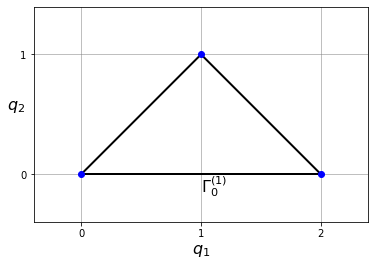

In [5]:
# Изобразим многоугольник и отметим ребро с отрицательной нормалью
ax1 = NPimage(C,S)
AddEdgeLabel(ax1,S,C,normlst,0,r'$\Gamma_0^{(1)}$', 0.15)
plt.show()

In [6]:
f1 = GetTrunc(eq,0,[x,epsilon]).factor()
f1

In [7]:
sol1 = solve(f1,x) 
sol1

In [8]:
[eq.subs(x,sol1[0]), eq.subs(x, sol1[1])]

Нулевому ребру соответствует многочлен $-x^2-1$, тогда начальное приближение корня есть $x_0=\pm1$


$ \varepsilon x^2 + 2x - 1 = 0$

In [9]:
eq2 = epsilon * x**2 + 2*x - 1 # Исходное уравнение
eq2

In [10]:
S,C = SCH(eq2,[x,epsilon])
normlst = Normlst(C,S)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([-1,  2,  0])), (1, array([ 0, -1,  0])), (2, array([ 1, -1, -1]))]

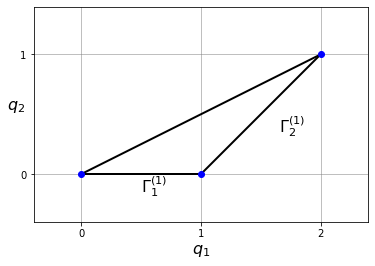

In [11]:
# Изобразим многоугольник и отметим ребро с отрицательной нормалью
ax1 = NPimage(C,S)
AddEdgeLabel(ax1,S,C,normlst,1,r'$\Gamma_1^{(1)}$', 0.15)
AddEdgeLabel(ax1,S,C,normlst,2,r'$\Gamma_2^{(1)}$', 0.15)
plt.show()

In [12]:
f1 = GetTrunc(eq2,1,[x,epsilon]).factor()
f1

In [13]:
f2 = GetTrunc(eq,2,[x,epsilon]).factor()
f2

In [14]:
sol1 = solve(f1,x) 
sol1

In [15]:
sol2 = solve(f2,x) 
sol2

Первому ребру соответствует многочлен $2{\varepsilon}x-1$, тогда начальное приближение корня есть $x_0=\frac{1}{2}$

Второму ребру соответствует многочлен $x(2\varepsilon + x)$, тогда начальное приближение корня есть $x_0= -2\varepsilon$

$\varepsilon{x^3} - 3x + 1 = 0$

In [16]:
eq3=epsilon*x**3-3*x+1 # Исходное уравнение
eq3

In [17]:
S,C = SCH(eq3,[x,epsilon])
normlst = Normlst(C,S)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([-1,  3,  0])), (1, array([ 0, -1,  0])), (2, array([ 1, -2, -1]))]

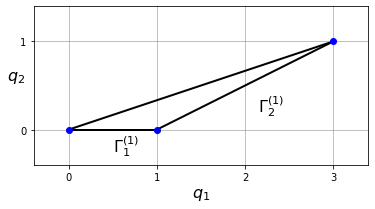

In [18]:
# Изобразим многоугольник и отметим ребро с отрицательной нормалью
ax1 = NPimage(C,S)
AddEdgeLabel(ax1,S,C,normlst,1,r'$\Gamma_1^{(1)}$', 0.25)
AddEdgeLabel(ax1,S,C,normlst,2,r'$\Gamma_2^{(1)}$', 0.15)
plt.show()

In [19]:
f3 = GetTrunc(eq3,1,[x,epsilon])
f3

In [20]:
f4 = GetTrunc(eq3,2,[x,epsilon])
f4

In [21]:
sol1 = solve(f3,x) 
sol1

In [22]:
sol2 = solve(f4,x) 
sol2